# Import Libraries

In [68]:
#NLP tools
import re, nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import gensim 
from gensim.models import Word2Vec
from nltk.util import ngrams
from nltk.tokenize.treebank import TreebankWordDetokenizer

# dataframe, plotting and wrangling
import numpy as np
import scipy as sp
import pandas as pd
import pandas_datareader as pdr
import math
import seaborn as sns; sns.set(color_codes=True)
import itertools
from collections import Counter
import matplotlib.pyplot as plt

#deep learning libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU
from keras.preprocessing import sequence
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [21]:
# function gets list of strings to be cleaned and min_freq: minimum frequency of each word in the text to keep.
# all words with less frequency than min_freq are removed, min_freq = 1 keeps all words in the text. 
# function returns cleaned text as a list of strings, and dictionaries made from text before and after cleaning. 
def text_cleaner(text, min_freq):
    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    words = set(nltk.corpus.words.words())
    txt = []
    tokens_after = []
    tokens = []
    for i in text:
        tokenized = word_tokenize(i)
        tokens.extend(tokenized)
    len_before = len(tokens)
    dic = Counter(tokens)
    for i in range(len(text)):
        temp = text[i]
        temp = temp.strip().lower()
        cleaned = re.sub('\W+', ' ', temp)
        tokenized = word_tokenize(cleaned)
        filtered = [word for word in tokenized if word not in stop_words]
        filtered_En = [word for word in filtered if word in words]
        lemmatized = [lemmatizer.lemmatize(token) for token in filtered_En]
        freq = [word for word in lemmatized if dic[word]>min_freq]
        tokens_after.extend(freq)
        string = TreebankWordDetokenizer().detokenize(freq)
        txt.append(string)
    len_after = len(tokens_after)
    dic_after = Counter(tokens_after)
    return(txt, dic, dic_after, len_after, len_before)

def pretty_print_conf_matrix(y_true, y_pred, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

# Import Data

In [3]:
train = pd.read_csv(r'C:\Users\srazavit\Desktop\ML\NLP\train_imdb.csv')
test = pd.read_csv(r'C:\Users\srazavit\Desktop\ML\NLP\test_imdb.csv')
train.head()

,Unnamed: 0,sentence,sentiment,polarity
0,0,Barbra Streisand's first television special wa...,10,1
1,1,When I heard the plot for this movie I simply ...,2,0
2,2,I caught the last half of this movie on cable ...,7,1
3,3,I am working my way through the Chilling Class...,2,0
4,4,This tender beautifully crafted production del...,10,1


## Cleaning

In [10]:
text = []
for i in range(len(train)):
        text.append(train.sentence[i])
        
txt, dic_before, dic_after, len_before, len_after = text_cleaner(text, 10)

In [14]:
print(text[1],'\n', '\n', txt[1])

When I heard the plot for this movie I simply had to see it, I mean whole cities being wiped out by killer tomatoes! Sadly the title is about as funny as it gets.<br /><br />Led by Detective Dick Mason, a special team of military and scientists (including Greg Colburn who never takes his SCUBA outfit off and Lt. Finletter who is never pictured without his parachute trailing behind) 'Attack Of The Killer Tomatoes' is a parody of B-Movies, in particular Japanese horror of the 1950's. The film begins with a standard sized tomato being discovered by a women washing up in her kitchen before we find ourselves in a middle of a crime scene as the tomato has supposedly murdered this lady, and let me tell you it doesn't get any saner as the film progresses! To be fair there are a couple of funny moments, for instance anytime the Japanese scientist Dr Nokitofa speaks his voice is dubbed over in an American accent, or when disguise expert Sam Smith infiltrates the tomatoes 'hey, can somebody pleas

## words frequency before cleanings

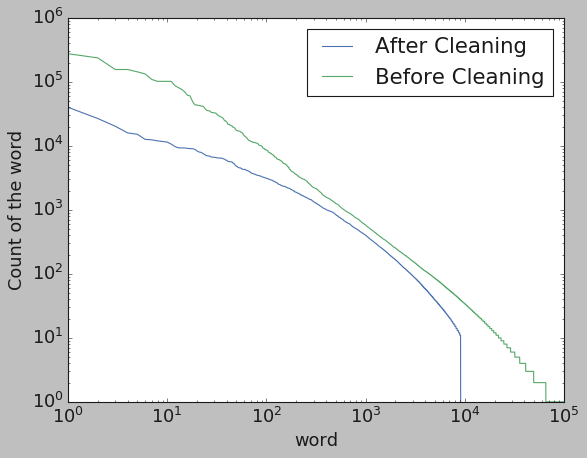

In [66]:
plt.yscale('log')
plt.xscale('log')
plt.xlabel('word')
plt.ylabel('Count of the word')
plt.rcParams.update({'font.size': 16})
plt.axis([1, 100000, 1, 1000000])
plt.plot(list(reversed(range(len(dic_after.values())))), sorted(dic_after.values()), label = 'After Cleaning')
plt.plot(list(reversed(range(len(dic_before.values())))), sorted(dic_before.values()), label = 'Before Cleaning')
plt.legend(loc="upper right");

## Length of Reviews before/after Cleaning

Mean 87.07 words after cleaning with stdev: 63.8
Mean 282.33 words before cleaning with stdev: 210.4


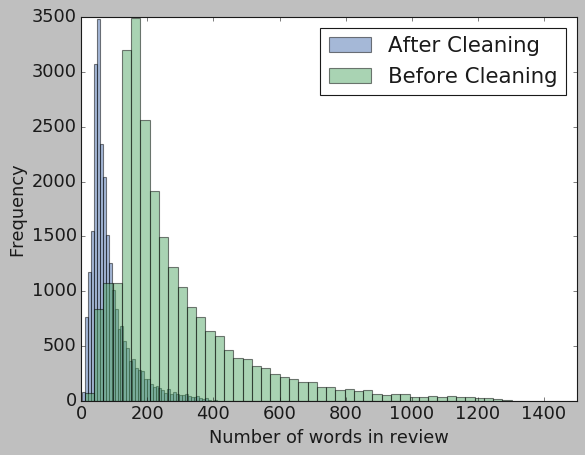

In [65]:
docs = text
ln_before = [len(word_tokenize(x)) for x in text] # len(x) returns length of characters. 
ln_after = [len(word_tokenize(x)) for x in txt]
plt.xlabel('Number of words in review')
plt.ylabel('Frequency')
plt.rcParams.update({'font.size': 16})
plt.hist(ln_after,bins = 100, edgecolor = 'black',alpha = 0.5, histtype='bar', label = 'After Cleaning')
plt.hist(ln_before,bins = 100, edgecolor = 'black',alpha = 0.5, histtype='bar', label = 'Before Cleaning')
plt.axis([0, 1500, 0, 3500])
print("Mean %0.2f words after cleaning with stdev: %.1f" % (np.mean(ln_after), np.std(ln_after)))
print("Mean %0.2f words before cleaning with stdev: %.1f" % (np.mean(ln_before), np.std(ln_before)))
plt.legend(loc="upper right");

## Saving

In [11]:
with open('imdb_cleaned.txt', 'w') as filehandle:
    for listitem in txt:
        filehandle.write('%s\n' % listitem)

## uploading

In [3]:
txt = []
with open('imdb_cleaned.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        temp = line[:-1]
        txt.append(temp)

# Word2Vec

In [46]:
tokens = []
for i in txt:
    tokenized = word_tokenize(i)
    tokens.append(tokenized)
model = gensim.models.Word2Vec(tokens,min_count = 10, size = 100, window = 10, workers=10, iter= 20, sample=0.001)
#save the model
model.wv.save_word2vec_format('imdb_embedding_w2v.txt', binary = False) #binary should be false so readable as text

## few examples

In [51]:
model.wv.most_similar(positive = 'perfect')

[('wonderful', 0.6097501516342163),
 ('perfection', 0.6064478754997253),
 ('superb', 0.5827547311782837),
 ('excellent', 0.5807034969329834),
 ('great', 0.5632277727127075),
 ('flawless', 0.5515923500061035),
 ('fantastic', 0.5467516183853149),
 ('fabulous', 0.5351839661598206),
 ('delightful', 0.5211518406867981),
 ('terrific', 0.5154913663864136)]

In [53]:
model.wv.most_similar_cosmul(positive = ['man', 'determined'], negative = ['fear'])

[('ex', 1.2654095888137817),
 ('hired', 1.2021087408065796),
 ('dashing', 1.1556947231292725),
 ('rich', 1.1553736925125122),
 ('partner', 1.1523219347000122),
 ('sailor', 1.130357265472412),
 ('gentleman', 1.0966370105743408),
 ('marry', 1.0955901145935059),
 ('millionaire', 1.0894733667373657),
 ('jealous', 1.087028980255127)]

### Manual one_hot

In [16]:
docs = txt
maxlen=200
one_text = " ".join(txt)
tkn = word_tokenize(one_text)
print("Number of all words: ", len(tkn))
uniques = (np.unique(np.hstack(tkn)))
print("Number of unique words: ", len(uniques))

dick_oneH = {}
keys = range(len(uniques))
values = uniques
for i in keys:
        dick_oneH[i] = values[i]
inv_dick = {v: k for k, v in dick_oneH.items()}

all_str = []
for i in txt:
    tkn = word_tokenize(i)
    strn = []
    for j in tkn:
        strn.append(inv_dick[j])
    all_str.append(strn)
padded_docs = sequence.pad_sequences(all_str, maxlen=200, padding='post')
print(np.shape(padded_docs))

Number of all words:  2183088
Number of unique words:  9609
(25000, 200)


## Vectorizer

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(txt)
#print(vectorizer.vocabulary_)
vector = vectorizer.transform(txt)
print(vector.shape)
print(type(vector))
print(vector.toarray())
y = []
for i in range(len(train)):
    y.append(train.polarity[i])
y = np.asarray(y)
x_train, y_train, x_test, y_test = vector[0:20000],y[0:20000],vector[20000:25000], y[20000:25000] 

(25000, 9599)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TFIDF Vectorizer

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(txt)
vector = vectorizer.transform(txt)
print(vector.shape)
print(type(vector))
print(vector.toarray())
y = []
for i in range(len(train)):
    y.append(train.polarity[i])
y = np.asarray(y)
x_train, y_train, x_test, y_test = vector[0:20000],y[0:20000],vector[20000:25000], y[20000:25000]

(25000, 9599)
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Logistic Regression TFIDF

In [31]:
classifier = LogisticRegression()
X_train = x_train.toarray()
X_test = x_test.toarray()
classifier.fit(X_train, y_train)

rpt = classification_report(y_test, y_pred, target_names = ['positive', 'negative'] )
print(rpt)
# 77-80% fscore with simple vectorizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

    positive       0.76      0.83      0.80      2531
    negative       0.81      0.74      0.77      2469

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



# NB on TFIDF vectorizer

In [19]:
classifier = GaussianNB(); 
X_train = x_train.toarray()
X_test = x_test.toarray()
classifier.fit(X_train, y_train)

rpt = classification_report(y_test, y_pred, target_names = ['positive', 'negative'] )
print(rpt)
#fscore of 71% and 74% for simple vectorizer

              precision    recall  f1-score   support

    positive       0.75      0.82      0.78      2531
    negative       0.80      0.72      0.76      2469

   micro avg       0.77      0.77      0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000



# SVC on Vectorizer

In [33]:
X_train = x_train.toarray()
X_test = x_test.toarray()
model = SVC()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
rpt = classification_report(y_test, y_pred, target_names = ['positive', 'negative'] )
print(rpt)
#80-82% fscore simple vec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    positive       0.00      0.00      0.00      2531
    negative       0.49      1.00      0.66      2469

   micro avg       0.49      0.49      0.49      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.24      0.49      0.33      5000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RF on Vectorizer

In [22]:
model = RandomForestClassifier()
X_train = x_train.toarray()
X_test = x_test.toarray()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
rpt = classification_report(y_test, y_pred, target_names = ['positive', 'negative'] )
print(rpt)
# fscore of 78/76% on simple vectorizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

    positive       0.76      0.83      0.80      2531
    negative       0.81      0.74      0.77      2469

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



# ANN on BoW

In [23]:
np.random.seed(141)
units = 1000
epochs = 16
batch_size = 128
lr = 0.01
x_train, y_train, x_test, y_test = vector[0:20000],y[0:20000],vector[20000:25000], y[20000:25000] 

model = Sequential()
model.add(Dense(units = units,input_dim = 9599, activation='relu'))
model.add(Dense(units = units, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = units, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1,  activation='sigmoid'))
#model.compile(loss = 'mse',  optimizer = "adam")
opt = SGD(lr=lr, momentum=0.9, decay=0.001)
model.compile(optimizer = opt, loss='binary_crossentropy' ,  metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 1, shuffle=True)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
# accuracy of 86.9% on simple vectorizer

W1211 12:15:04.284724 13968 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1211 12:15:04.300350 13968 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1211 12:15:04.300350 13968 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1211 12:15:04.315980 13968 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1211 12:15:04.331636 13968 deprecation.py:506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              9600000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total params: 11,603,001
Trainable params: 11,603,001
Non-trainable params: 0
________________________________________________________________

# ANN on Keras Embedding

In [55]:
txt_train = padded_docs[0:20000]
txt_test = padded_docs[20000:25000]
y = []
for i in range(len(train)):
    y.append(train.polarity[i])
y = np.asarray(y)
y_train = y[0:20000]
y_test = y[20000:25000]

top_words = len(uniques)
max_words = 200

# create the model
model = Sequential()
model.add(Embedding(top_words, 128, input_length=max_words))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(txt_train, y_train, validation_data=(txt_test, y_test), epochs=8, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(txt_test, y_test, verbose=0)
print("Accuracy: %.3f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          1229952   
_________________________________________________________________
flatten_5 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               12800500  
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_8 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2510      
__________

# ANN on W2V fed to Keras Embedding

## W2V to a Dict

In [50]:
#W2V dict made on imdb
import os
embeddings_index = dict()
f = open('imdb_embedding_w2v.txt',  encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
vocab_size = len(embeddings_index)

Loaded 12595 word vectors.


In [9]:
#glove dict
import os
embeddings_index = dict()
f = open('glove.6B.100d.txt',  encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
vocab_size = len(uniques)

Loaded 400000 word vectors.


## Dict to an Embedding Matrix

In [51]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in inv_dick.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: #in case a word was not in the w2v embedding. 
        embedding_matrix[i] = embedding_vector
np.shape(embedding_matrix)

(12595, 100)

## non_trainable Embedding fed to Keras layer

In [11]:
txt_train = padded_docs[0:20000]
txt_test = padded_docs[20000:25000]
y = []
for i in range(len(train)):
    y.append(train.polarity[i])
y = np.asarray(y)
y_train = y[0:20000]
y_test = y[20000:25000]

top_words = vocab_size
max_words = 200

# create the model
lrs = [ 0.00005]
for lr in lrs:
    model = Sequential()
    e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_words, trainable=False)
    model.add(e)
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr = lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    # Fit the model
    model.fit(txt_train, y_train, validation_data=(txt_test, y_test), epochs=8, batch_size=128, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(txt_test, y_test, verbose=0)
    print("Accuracy: %.3f" % (scores[1]*100))
# 84% with w2v embedding on IMDB

W1220 10:34:45.690004  6480 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1220 10:34:45.690004  6480 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1220 10:34:45.700745  6480 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1220 10:34:45.700745  6480 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1220 10:34:45.775284  6480 deprecation.py:506] From C:\ProgramData

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          960900    
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               10000500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
__________